In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Train test Split

In [3]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

## Model Training

In [5]:
knn_clf = KNeighborsClassifier() # Default ED , K= 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluation

In [6]:
# Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification report\n",clf_report)

Confusion matrix
 [[77 23]
 [28 26]]
Accuarcy 0.6688311688311688
Classification report
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.53      0.48      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.67      0.66       154



In [7]:
# Training
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[357  43]
 [ 77 137]]
Accuarcy 0.8045602605863192
Classification report
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       400
           1       0.76      0.64      0.70       214

    accuracy                           0.80       614
   macro avg       0.79      0.77      0.78       614
weighted avg       0.80      0.80      0.80       614



# Hyperparamter Tuning

## 1) GridsearchCv

In [8]:
knn_clf = KNeighborsClassifier()
hyperparameter = {"n_neighbors":np.arange(3,40),
                 "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameter,cv = 5)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=30, p=1)

In [9]:
knn_clf = KNeighborsClassifier(n_neighbors=30, p=1) # Default ED> p=1 , K= 30
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30, p=1)

In [10]:
# Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification report\n",clf_report)

Confusion matrix
 [[84 16]
 [30 24]]
Accuarcy 0.7012987012987013
Classification report
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.60      0.44      0.51        54

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154



In [11]:
# Training
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[369  31]
 [109 105]]
Accuarcy 0.7719869706840391
Classification report
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       400
           1       0.77      0.49      0.60       214

    accuracy                           0.77       614
   macro avg       0.77      0.71      0.72       614
weighted avg       0.77      0.77      0.76       614



## 2) RandomizeD SearchCv`

In [12]:
knn_clf = KNeighborsClassifier()
hyperparameter = {"n_neighbors":np.arange(3,30),
                 "p":[1,2]}
rscv_knn_clf = RandomizedSearchCV(knn_clf,hyperparameter,cv = 5)
rscv_knn_clf.fit(x_train,y_train)
rscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=29, p=1) # Default ED> p=1 , K= 32
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=29, p=1)

In [14]:
# Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification report\n",clf_report)

Confusion matrix
 [[83 17]
 [29 25]]
Accuarcy 0.7012987012987013
Classification report
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       100
           1       0.60      0.46      0.52        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.65       154
weighted avg       0.69      0.70      0.69       154



In [15]:
# Training
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[365  35]
 [100 114]]
Accuarcy 0.7801302931596091
Classification report
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       400
           1       0.77      0.53      0.63       214

    accuracy                           0.78       614
   macro avg       0.78      0.72      0.74       614
weighted avg       0.78      0.78      0.77       614



## Feature Engineering

# 1. Normalization

In [16]:
x_df = df.drop("Outcome",axis=1)
y    = df["Outcome"]

In [17]:
x_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [18]:
x_std = (127 - 79.79)/115.24
x_std

0.4096667823672336

<AxesSubplot:>

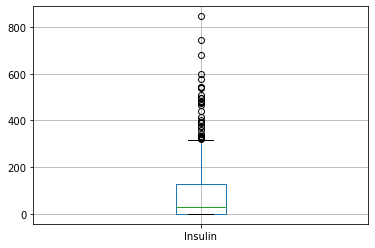

In [19]:
df[["Insulin"]].boxplot()

In [21]:
normal_scalar = MinMaxScaler()
array  = normal_scalar.fit_transform(x_df)
x_nomrmal_df = pd.DataFrame(array,columns=x_df.columns)
x_nomrmal_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
# x =  x_nomrmal_df.copy()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_nomrmal_df,y,test_size=0.2,random_state=42,stratify=y)

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=30, p=1) # Default ED> p=1 , K= 30
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30, p=1)

In [24]:
# Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification report\n",clf_report)

Confusion matrix
 [[88 12]
 [31 23]]
Accuarcy 0.7207792207792207
Classification report
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [25]:
# Training
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[379  21]
 [120  94]]
Accuarcy 0.7703583061889251
Classification report
               precision    recall  f1-score   support

           0       0.76      0.95      0.84       400
           1       0.82      0.44      0.57       214

    accuracy                           0.77       614
   macro avg       0.79      0.69      0.71       614
weighted avg       0.78      0.77      0.75       614



## 2.Standirdization

In [26]:
std_scalar = StandardScaler()
array  = std_scalar.fit_transform(x_df)
x_std_df = pd.DataFrame(array,columns=x_df.columns)
x_std_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_std_df,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=23, p=1) # Default ED> p=1 , K= 30
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23, p=1)

In [29]:
# Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification report\n",clf_report)

Confusion matrix
 [[88 12]
 [26 28]]
Accuarcy 0.7532467532467533
Classification report
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [31]:
# Training
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[376  24]
 [112 102]]
Accuarcy 0.7785016286644951
Classification report
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       400
           1       0.81      0.48      0.60       214

    accuracy                           0.78       614
   macro avg       0.79      0.71      0.72       614
weighted avg       0.78      0.78      0.76       614

